In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('seeds.csv')

In [3]:
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


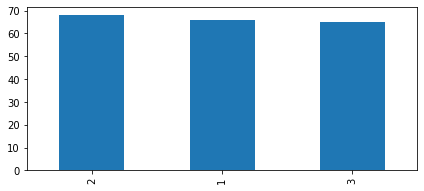

In [4]:
df['Type'].value_counts().plot(kind='bar', figsize=(7,3))
plt.show()

In [5]:
df.corr()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
Area,1.000000,0.994437,0.609887,0.951126,0.970980,-0.222820,0.862727,-0.340664
Perimeter,0.994437,1.000000,0.531841,0.972944,0.945496,-0.211034,0.889543,-0.322223
Compactness,0.609887,0.531841,1.000000,0.374011,0.762167,-0.329400,0.227016,-0.539261
Kernel.Length,0.951126,0.972944,0.374011,1.000000,0.862680,-0.169704,0.932124,-0.249422
Kernel.Width,0.970980,0.945496,0.762167,0.862680,1.000000,-0.253122,0.748228,-0.421961
Asymmetry.Coeff,-0.222820,-0.211034,-0.329400,-0.169704,-0.253122,1.000000,-0.003349,0.573956
Kernel.Groove,0.862727,0.889543,0.227016,0.932124,0.748228,-0.003349,1.000000,0.035508
Type,-0.340664,-0.322223,-0.539261,-0.249422,-0.421961,0.573956,0.035508,1.000000


In [3]:
X = df[['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width', 'Asymmetry.Coeff', 'Kernel.Groove']]
y = df['Type']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size = 0.5, stratify=y)

In [8]:
y_train.value_counts(), y_test.value_counts()

(2    34
 1    33
 3    32
 Name: Type, dtype: int64,
 2    34
 3    33
 1    33
 Name: Type, dtype: int64)

**DecisionTreeClassifier**

In [16]:
param_grid = {'min_samples_split': [30, 40, 50], 'max_depth': [5, 10, 15, 20], 'criterion': ['entropy', 'gini', 'log_loss']}
grid=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, scoring='accuracy',cv=3, verbose=1, refit=True )
grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 348, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [30, 40, 50]},
             scoring='accuracy', verbose=1)

In [17]:
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 40}
DecisionTreeClassifier(max_depth=10, min_samples_split=40)
Mean cross-validated score of the best_estimator:  0.9191919191919192
The number of cross-validation splits (folds/iterations):  3


In [18]:
model = DecisionTreeClassifier(min_samples_split=40,  max_depth=10, criterion = 'gini')
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=40)

In [19]:
balanced_accuracy_score(y_test, model.predict(X_test))

0.8992869875222816

In [20]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.83      0.88      0.85        33
           2       0.97      0.97      0.97        34
           3       0.90      0.85      0.88        33

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



**LogisticRegression**

In [21]:
param_grid = {'C': [1, 2, 3, 4, 5, 6, 7], 'penalty': ['l1', 'l2', 'elasticnet']}
grid=GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy',cv=3, verbose=1, refit=True )
grid.fit(X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  Fi

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [22]:
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

{'C': 2, 'penalty': 'l2'}
LogisticRegression(C=2)
Mean cross-validated score of the best_estimator:  0.9595959595959597
The number of cross-validation splits (folds/iterations):  3


In [23]:
model = LogisticRegression(C = 2, penalty = 'l2')
model.fit(X_train, y_train)

/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=2)

In [24]:
balanced_accuracy_score(y_test, model.predict(X_test))

0.9200831847890671

In [25]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.86      0.91      0.88        33
           2       0.94      0.91      0.93        34
           3       0.97      0.94      0.95        33

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



**RandomForestClassifier**

In [26]:
param_grid = {'n_estimators': [50, 60, 70, 80, 90, 100], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [5, 10, 15, 20]}
grid=GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, refit=True )
grid.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/mihailsidorov/opt/anaconda3/lib/pyt

/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/mihailsidorov/opt/anaconda3/lib/pyt

/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/mihailsidorov/opt/anaconda3/lib/pyt

/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/mihailsidorov/opt/anaconda3/lib/pyt

/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/mihailsidorov/opt/anaconda3/lib/pyt

/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/mihailsidorov/opt/anaconda3/lib/pyt

/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/mihailsidorov/opt/anaconda3/lib/pyt

/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/mihailsidorov/opt/anaconda3/lib/pyt

/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/mihailsidorov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/mihailsidorov/opt/anaconda3/lib/pyt

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 20],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy', verbose=1)

In [27]:
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 60}
RandomForestClassifier(max_depth=20, n_estimators=60)
Mean cross-validated score of the best_estimator:  0.9292929292929294
The number of cross-validation splits (folds/iterations):  3


In [5]:
model = RandomForestClassifier(criterion = 'gini', max_depth = 20, n_estimators=60)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=60)

In [29]:
balanced_accuracy_score(y_test, model.predict(X_test))

0.9096850861556743

In [30]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.85      0.88      0.87        33
           2       0.94      0.94      0.94        34
           3       0.94      0.91      0.92        33

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



**KNeighborsClassifier**

In [31]:
param_grid = {'n_neighbors': [1, 2, 3, 4, 5], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid=GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, refit=True )
grid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [32]:
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=3, p=1)
Mean cross-validated score of the best_estimator:  0.9595959595959597
The number of cross-validation splits (folds/iterations):  3


In [33]:
model = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [34]:
balanced_accuracy_score(y_test, model.predict(X_test))

0.9004753416518122

In [35]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.83      0.88      0.85        33
           2       1.00      0.85      0.92        34
           3       0.89      0.97      0.93        33

    accuracy                           0.90       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.90      0.90       100



**SVC**

In [9]:
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid=GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy',cv=3, verbose=1, refit=True )
grid.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [10]:
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=5, gamma=0.1)
Mean cross-validated score of the best_estimator:  0.9595959595959597
The number of cross-validation splits (folds/iterations):  3


In [11]:
model=SVC(C=5, gamma = 0.1, kernel='rbf', tol=0.001)
model.fit(X_train, y_train)

SVC(C=5, gamma=0.1)

In [12]:
balanced_accuracy_score(y_test, model.predict(X_test))

0.9001782531194297

In [13]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.85      0.85      0.85        33
           2       0.97      0.88      0.92        34
           3       0.89      0.97      0.93        33

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [5]:
from joblib import load

model = load('rf.pkl')

In [17]:
model.predict([df[['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width', 'Asymmetry.Coeff', 'Kernel.Groove']].iloc[0, :].tolist()])[0]

1

In [15]:
[df[['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width', 'Asymmetry.Coeff', 'Kernel.Groove']].iloc[0, :].tolist()]

[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22]